In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from astropy.coordinates import SkyCoord
from hips import WCSGeometry
from hips import make_sky_image, HipsPainter

geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="3 deg",
     coordsys='galactic', projection='AIT',
)


In [3]:
hips_survey = 'CDS/P/DSS2/red'

In [4]:
precise_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=True)


In [5]:
precise_painter.run()

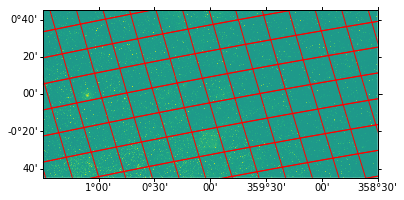

In [6]:
precise_painter.plot_mpl_hips_tile_grid()

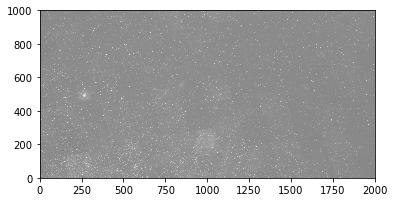

In [7]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


In [10]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=False)
simple_painter.run()


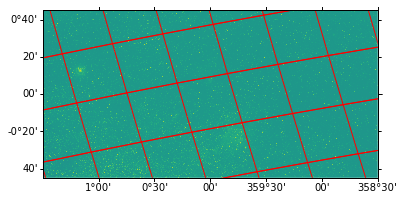

In [11]:
simple_painter.plot_mpl_hips_tile_grid()

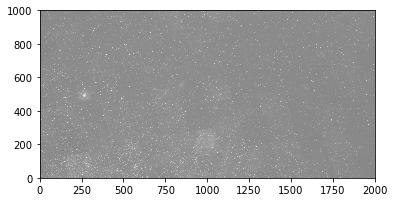

In [12]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


### Using the same example as: http://cds.unistra.fr/~boch/AL/test-reduce-deformations2.html

In [19]:
# geometry = WCSGeometry.create(
#      skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
#      width=2000, height=1000, fov="13 deg",
#      coordsys='icrs', projection='AIT',
# )


geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="12.98 deg",
     coordsys='galactic', projection='AIT',
)



In [20]:
hips_survey = 'CDS/P/DSS2/color'
precise_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=True)

In [21]:
precise_painter.run()

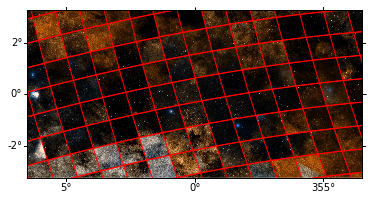

In [22]:
precise_painter.plot_mpl_hips_tile_grid()

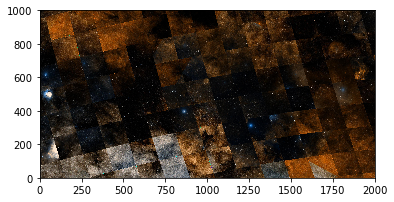

In [23]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)

In [24]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=False)
simple_painter.run()


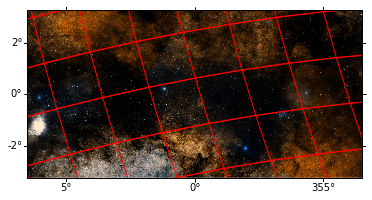

In [25]:
simple_painter.plot_mpl_hips_tile_grid()

[ 10.12683778  14.1772154 ]


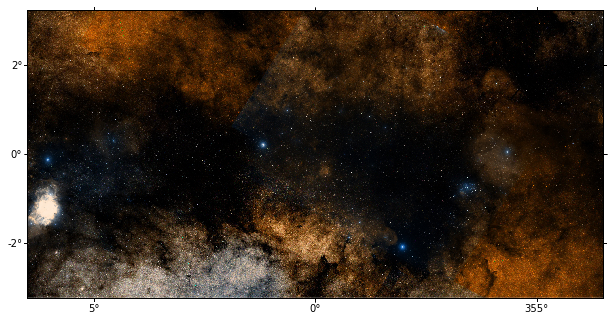

In [26]:
from astropy.visualization.wcsaxes import WCSAxes

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=geometry.wcs)
fig.add_axes(ax)

coord = SkyCoord([10.12683778, 14.1772154], [56.53733116, 60.7167403], unit='deg')
print(coord.data.lon.deg)
plt.plot(coord.data.lon.deg, coord.data.lat.deg, lw=30, transform=ax.get_transform('world'), color='red')
plt.imshow(simple_painter.image, cmap='gray', origin='lower',)


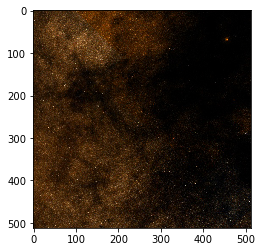

In [30]:
plt.imshow(simple_painter.draw_tiles[19].data)

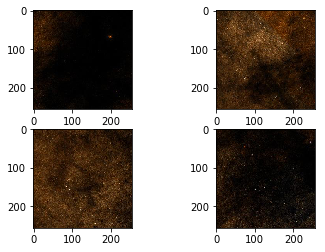

In [31]:
f, axarr = plt.subplots(2,2)
children = simple_painter.draw_tiles[19].children
axarr[0,0].imshow(children[0].data)
axarr[0,1].imshow(children[1].data)
axarr[1,0].imshow(children[2].data)
axarr[1,1].imshow(children[3].data)


In [29]:
# simple_painter._tiles = simple_painter.draw_tiles[19]
# simple_painter.draw_tiles()
# simple_painter.plot_mpl_hips_tile_grid()